# Random Walk
Here we will Create a Random Graph with N-nodes with probability p or $$ G(n,p)$$. and our Target is to explore the Complete graph of N-nodes and calculte number of steps it is taking to complete it it is actually
 $$n\log(n)$$ Steps and we will see it how?


In [1]:
import random
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

20 ---> 123.6
21 ---> 155.7
22 ---> 113.7
23 ---> 128.0
24 ---> 98.0
25 ---> 142.3
26 ---> 166.1
27 ---> 145.1
28 ---> 114.0
29 ---> 156.5
30 ---> 179.1
31 ---> 148.6
32 ---> 193.5
33 ---> 172.6
34 ---> 150.2
35 ---> 170.2
36 ---> 139.3
37 ---> 165.4
38 ---> 192.0
39 ---> 187.9
40 ---> 236.3
41 ---> 223.9
42 ---> 195.9
43 ---> 232.3
44 ---> 206.0
45 ---> 213.3
46 ---> 267.6
47 ---> 267.1
48 ---> 233.7
49 ---> 264.5
50 ---> 230.2
51 ---> 262.1
52 ---> 303.6
53 ---> 287.9
54 ---> 237.2
55 ---> 245.6
56 ---> 275.1
57 ---> 255.3
58 ---> 312.5
59 ---> 289.0
60 ---> 292.0
61 ---> 323.5
62 ---> 359.6
63 ---> 408.9
64 ---> 331.2
65 ---> 415.1
66 ---> 353.0
67 ---> 384.6
68 ---> 385.8
69 ---> 311.2
70 ---> 387.6
71 ---> 469.2
72 ---> 320.7
73 ---> 410.0
74 ---> 428.1
75 ---> 388.5
76 ---> 392.4
77 ---> 393.8
78 ---> 409.7
79 ---> 395.9
80 ---> 467.7
81 ---> 437.6
82 ---> 427.3
83 ---> 435.9
84 ---> 469.5
85 ---> 469.8
86 ---> 488.9
87 ---> 424.3
88 ---> 492.5
89 ---> 532.8
90 ---> 472.0
91 --->

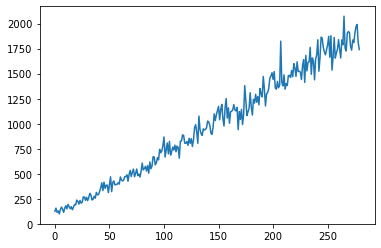

In [2]:
def walk(n,p):
    start=random.randint(0,n-1)
    G=nx.erdos_renyi_graph(n,p)
    S=set([])
    v=start
    count=0
    while(len(S)<n):
        Nbr=list(nx.neighbors(G,v))
        v=random.choice(Nbr)
        S.add(v)
        count=count+1
    return count
l=[]
for i in range(20,300):
    z=[]
    for j in range(10):
        z.append(walk(i,0.3))
    l.append(np.mean(z))
    print (i,"--->",np.mean(z))
plt.plot(l)
plt.show()



# Implementing PageRank Using Point Distribution Method
First we will Create nodes in a directed grpah and thereafter we have to create edges and we will create edges by the process of random walk having the probability $$\textbf{'p'}$$  
"Intuitively suppose we are standing at one node and we toss coin and if it is head we will create edge else we will not, However in this case probaility is 0.5" that is we will be randomly adding edges of the graph to create random grpah

In [3]:
#Creating Random Grpahs Using randomly adding edges
def add_edges(G,p):
    #we have to take all possible edges
    for i in G.nodes():
        for j in G.nodes():#Now (i,j) will give us all possible edged
            if(i!=j):
                r=random.random()
                if(r<=p):
                    G.add_edge(i,j)
                else:
                    continue
    return G

#Creating a point list this point list have 100 points for each node
def initialize_points(G):
    points=[100 for i in range(G.number_of_nodes())]
    return (points)

#distribute points 
def  distribute_points(G,points):
    prev_points=points
    #now we will create new list of points and initially will initialize it to zero.
    #it is going to change through iterations

    new_points=[0 for i in range(G.number_of_nodes())]
    
    #Now to distribute for every link we will look at its outlinks that is 
    #for every node i we will find number of outlinks to the node
    
    for i in G.nodes():
        #the function outedges will return number of outedges of node i
        out=G.out_edges(i)
        # now we have to distribute the equal share of points of node i to its outedges
        if len(out)==0:
            #if there are no outedges then len(out)=0 and we don't need to distribute and thus point of this node will
            #depend only on the link. that's why we are adding it
            new_points[i]+=prev_points[i]
        else:
            share=float(prev_points[i]/len(out))
            #The above share must be distributed among the neighbors
            #and we had found out neighbor by G.outedges()
            for each in out:
                new_points[each[1]]+=share
    return(G,new_points)

#now we have to create a function which should distrubute points to the nodes until it converges
def keep_distributing_points(G,points):
    prev_points=points
    print("Enter # to stop")
    while(1):
        G,new_points=distribute_points(G,prev_points)
        print(new_points)
        # so we will stop at convergence let's we observe the convergence by itself and enter # when it converges
        #now to avoid accumulation by those points having no outlinks we will follow
        new_points= handle_points_sink(G,new_points)
        char=input()
        if char=='#':
            break
        prev_points=new_points
    return(G,new_points)

def get_nodes_sorted_by_points(points):
    #let sort array by indices using numpy
    points_array=np.array(points)
    nodes_sorted_by_points=np.argsort(-points_array)
    return nodes_sorted_by_points
    
    
def handle_points_sink(G,points):
    for i in range(len(points)):
        points[i]=points[i]*0.8
        
    n=G.number_of_nodes()
    extra=100*0.2/n
    for i in range(len(points)):
        points[i]+=extra
    return(points)

In [4]:
def main():
    #Create/take a directed grpah with 'n'nodes
    G=nx.DiGraph()
    G.add_nodes_from([i for i in range(10)])#taking number of nodes to be 10
    G=add_edges(G, 0.3)
    
    #Assign 100 points to each node
    points=initialize_points(G)
    print(points) 
    nx.draw(G)
    
    #keep distributing points until convergence
    G,points=keep_distributing_points(G,points)
    #Get nodes ranking as per the points accumulated
    nodes_sorted_by_points= get_nodes_sorted_by_points(points)
    print ('nodes sorted by points',nodes_sorted_by_points)
    #Compare the ranks obtained from this method to the networkx pagerank library
    pr=nx.pagerank(G) #this is dictionary
    #we can't sort dictionary directly that's why we are usnig lamda function to do that
    pr_sorted=sorted(pr.items(),key=lambda x:x[1], reverse=True)
    for i in pr_sorted:
        print (i[0],)

In [ ]:
main()

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Enter # to stop
[175.0, 108.33333333333334, 83.33333333333334, 0, 141.66666666666669, 0, 75.0, 175.0, 158.33333333333334, 83.33333333333334]

[125.16666666666669, 150.5, 53.33333333333334, 0, 102.83333333333334, 0, 54.83333333333334, 208.50000000000003, 71.5, 53.33333333333334]

[97.60000000000002, 122.13333333333335, 30.588888888888892, 0, 94.38888888888891, 0, 45.900000000000006, 165.93333333333337, 88.86666666666667, 30.588888888888892]

[64.63333333333335, 103.22888888888892, 31.680000000000007, 0, 71.55777777777779, 0, 43.70000000000001, 142.47777777777782, 71.84222222222223, 31.680000000000007]

[62.16177777777779, 80.38251851851855, 27.68844444444445, 0, 65.15274074074077, 0, 36.51422222222223, 107.24533333333335, 61.806518518518544, 27.68844444444445]

[52.80263703703705, 67.99143703703706, 23.765096296296306, 0, 52.2445925925926, 0, 29.93780740740742, 96.56340740740745, 47.841925925925935, 23.765096296296306]

[45.616402962962


[14.226379560534706, 16.609549875731922, 6.170169851687606, 0, 13.476764851529435, 0, 7.362199256764235, 23.294374834352986, 12.700668101099012, 6.170169851687606]

[14.226113797171513, 16.60918540026115, 6.170053422023599, 0, 13.476487698306304, 0, 7.362043595366187, 23.293873680583815, 12.700409930973848, 6.170053422023599]

[14.22590118648055, 16.608893819885726, 6.16996027829242, 0, 13.476265975729442, 0, 7.361919066246999, 23.29347275756588, 12.700203394874581, 6.16996027829242]

[14.22573109792805, 16.608660555584706, 6.16988576330745, 0, 13.47608859766707, 0, 7.361819442952061, 23.29315201915292, 12.700038165994712, 6.16988576330745]

[14.22559502708588, 16.608473944144276, 6.1698261513194925, 0, 13.475946695217642, 0, 7.361739744315884, 23.292895428421815, 12.699905982891053, 6.1698261513194925]

[14.225486170412246, 16.608324654991716, 6.169778461729113, 0, 13.47583317325785, 0, 7.361675985407066, 23.29269015583732, 12.699800236408006, 6.169778461729113]

[14.22539908507328, 

[14.22505076268303, 16.607727524391702, 6.169587711676323, 0, 13.475379105197433, 0, 7.361420960879945, 23.291869101262208, 12.699377268899656, 6.169587711676323]

[14.225050758889928, 16.607727519189734, 6.169587710014584, 0, 13.47537910124177, 0, 7.361420958658272, 23.2918690941095, 12.699377265214931, 6.169587710014584]

[14.225050755855449, 16.60772751502816, 6.169587708685192, 0, 13.47537909807724, 0, 7.3614209568809335, 23.291869088387337, 12.699377262267147, 6.169587708685192]

[14.225050753427864, 16.6077275116989, 6.1695877076216785, 0, 13.475379095545616, 0, 7.361420955459062, 23.29186908380961, 12.699377259908921, 6.1695877076216785]

[14.225050751485794, 16.607727509035495, 6.1695877067708675, 0, 13.475379093520317, 0, 7.361420954321565, 23.29186908014742, 12.699377258022345, 6.1695877067708675]

[14.22505074993214, 16.607727506904766, 6.16958770609022, 0, 13.475379091900077, 0, 7.361420953411569, 23.291869077217672, 12.699377256513078, 6.16958770609022]

[14.22505074868921

[14.225050743717794, 16.607727498382232, 6.169587703367743, 0, 13.4753790854194, 0, 7.361420949771736, 23.29186906549919, 12.699377250476283, 6.169587703367743]

[14.225050743717738, 16.607727498382157, 6.1695877033677196, 0, 13.475379085419345, 0, 7.361420949771704, 23.291869065499085, 12.699377250476232, 6.1695877033677196]

[14.225050743717697, 16.607727498382097, 6.169587703367702, 0, 13.475379085419299, 0, 7.361420949771679, 23.291869065499004, 12.69937725047619, 6.169587703367702]

[14.225050743717663, 16.60772749838205, 6.169587703367686, 0, 13.475379085419265, 0, 7.361420949771658, 23.291869065498936, 12.699377250476154, 6.169587703367686]

[14.225050743717633, 16.607727498382012, 6.169587703367673, 0, 13.475379085419233, 0, 7.361420949771642, 23.291869065498886, 12.699377250476129, 6.169587703367673]

[14.22505074371761, 16.607727498381983, 6.169587703367664, 0, 13.47537908541921, 0, 7.361420949771627, 23.291869065498844, 12.699377250476106, 6.169587703367664]

[14.22505074371